# Hybrid-Functional Calculations 
**by <span style="color:darkgreen">Cecilia Vona</span>, <span style="color:darkgreen">Ute Werner</span>, & <span style="color:darkgreen">Dmitrii Nabok</span> for [<span style="color:darkgoldenrod">exciting *neon*</span>](https://www.exciting-code.org/neon)**

<font size="2">(Jupyter notebook by <span style="color:darkgreen">Mara Voiculescu</span> & <span style="color:darkgreen">Martin Kuban</span>)</font>
<hr style="border:2px solid #DDD"> </hr>

**<span style="color:firebrick">Purpose</span>**: In this tutorial, you will learn how to perform ground-state calculations with the hybrid functionals **PBE0** and **HSE**. We will use diamond as test material. Since Diamond has an indirect band-gap, instead of considering the gap, we will look at how the transition energies in specific symmetry point changes, depending on the functional employed. Specifically we will consider the transition Γ→Γ and Γ→X.
<hr style="border:2px solid #DDD"> </hr>

<div class="alert alert-block alert-warning">

**Table of Contents**
    
[0. Before Starting](#0)
    
[1. Theoretical Background](#1)  
    
[2. PBE Calculation](#2)
   - Preparation of the Input File
   - Execute the Calculation 

[3. PBE0 Calculation](#3)
   - Preparation of the Input File
   - Execute the Calculation 
    
[4. HSE Calculation](#4)
   - Preparation of the Input File
   - Execute the Calculation 
    
[5. Post Processing](#5)      

[6. Band Structure and Density of States ](#6)
    
[7. Exercise](#7)
</div>

<a id='0'></a>
<hr style="border:1px solid #DDD"> </hr>

### <span style="color:#15317E">0. Before Starting</span>

**<span style="color:firebrick">Read the following paragraphs before starting with the rest of this tutorial!</span>**

Before running any Jupyter tutorials, please refer to the **`00_before_starting.md`** document on how to correctly set up the environment. This only needs to be done once. After which, the **venv** can be (re)activated from **`exciting`**'s root directory:

<div style="background-color: rgb(224, 224, 224);">

```bash
source tools/excitingjupyter/venv/excitingvenv/bin/activate
```

</div>

As a first step, you may create a running directory for the notebook.

In [1]:
%%bash
mkdir -p run_tutorial_hybrid_functional_calculations

<a id='1'></a>
<hr style="border:1px solid #DDD"> </hr>

### <span style="color:#15317E">1. Theoretical Background</span>

The hybrid exchange-correlation functionals are constructed by substituting a fraction of local/semi-local exchange by a fraction of non-local exact-exchange:

\begin{equation}
E^{hyb}_{xc} = E^L_{xc}+\alpha (E^{NL}_x-E^L_x).
\end{equation}

The non-local exact exchange is often computed employing Hartree-Fock (**HF**). The type of the **DFT** local/semi-local functional and the fraction of non-local exact exchange substituted ($\alpha$) vary depending on the hybrid functional type.

The hybrid functionals **PBE0** and **HSE** are implemented in **`exciting`**. PBE0 has the following form:

\begin{equation}
E^{PBE0}_{xc} = E^{PBE}_{xc}+\alpha (E^{HF}_x-E^{PBE}_x)\; ,
\end{equation}

in which the semi-local functional is **PBE** and the fraction of exact-exchange substituted is uniquely determined by the mixing parameter α, which has the value **<span style="color:firebrick">0.25</span>**.

The hybrid functional HSE, which is a screened hybrid functional, has the following form:

\begin{equation}
E^{HSE}_{xc} = E^{PBE}_{xc}+\alpha [E^{HF,SR}_x(\omega)-E^{PBE,SR}_x(\omega)].
\end{equation}

Also in **HSE**, **PBE** is used as semi-local functional, but only the short-range part of the non-local exact exchange is substituted. In fact, in **HSE** the amount of non-local exact exchange is determined by both the mixing parameter $\alpha$=**<span style="color:firebrick">0.25</span>** and the screening screening parameter $\omega$, which defines the cutoff between the short-range and the long-range part of the Coulomb operator through the error function and its complementary:

\begin{equation}
v(r)=v^{SR}(r,\omega)+v^{LR}(r,\omega)=\frac{\text{erfc}(\omega r)}{r}+\frac{\text{erf}(\omega r)}{r}.
\end{equation}

The version of **HSE** which is implemented in **`exciting`** is **HSE06**, in which the **PBE** and **HF** contributions have the same value of $\omega$=**<span style="color:firebrick">0.11 $a_0^{-1}$</span>**.

<a id='2'></a>
<hr style="border:1px solid #DDD"> </hr>

### <span style="color:#15317E">2. PBE Calculation</span>

In order to investigate and compare the effect of hybrid functionals on the transition energies, we will start by performing a **GGA** calculation. For this purpose, we will use the **PBE** functional.

Before starting the calculation, create a subdirectory called **PBE**.

In [2]:
%%bash
cd run_tutorial_hybrid_functional_calculations
mkdir -p PBE
cd ..

#### <span style="color:#15317E">i) Preparation of the Input File</span>

We start by creating an **`exciting`** (**xml**) input file called **input.xml** to compute the ground-state of diamond using the semi-local functional **PBE**. The file can look like this:

<span class="DIAMOND_PBE"></span>
```xml
<input>
 
   <title>Diamond PBE</title>
 
   <structure speciespath="$EXCITINGROOT/species" >
      <crystal scale="6.7425">
         <basevect> 0.0     0.5     0.5 </basevect>
         <basevect> 0.5     0.0     0.5 </basevect>
         <basevect> 0.5     0.5     0.0 </basevect>
      </crystal>
      <species speciesfile="C.xml">
         <atom coord="0.00 0.00 0.00" />
         <atom coord="0.25 0.25 0.25" />
      </species>
   </structure>
 
   <groundstate 
      ngridk="4 4 4"
      rgkmax="5.0"
      xctype="GGA_PBE">
   </groundstate>
 
</input>
```

The next step is writing the complete input as a string and saving it in your working directory as **input.xml**.

In [4]:
import os
from excitingjupyter.utilities import get_input_xml_from_notebook   

# Extract input file content from this notebook:
input_str_PBE = get_input_xml_from_notebook("05_tutorial_hybrid_functional_calculations", "DIAMOND_PBE")

# Write out the input as an XML file:
with open('./run_tutorial_hybrid_functional_calculations/PBE/input.xml', "w") as fid:
    fid.write(input_str_PBE)

#### <span style="color:#15317E">ii) Execute the Calculation</span>

Before starting the calculation, remember to set the correct path for the **`exciting`** root directory (**$EXCITINGROOT**) to the one pointing to the place where the **`exciting`** directory is placed, using the command

In [3]:
%%bash
cd run_tutorial_hybrid_functional_calculations/PBE
python3 -m excitingscripts.setup.excitingroot
cd ../..

Start the calculation by using the script **`excitingscripts.execute.single`**.

In [1]:
%%bash
cd run_tutorial_hybrid_functional_calculations
python3 -m excitingscripts.execute.single -r PBE
cd ..

<a id='3'></a>
<hr style="border:1px solid #DDD"> </hr>

### <span style="color:#15317E">3. PBE0 Calculation</span>

Now we can repeat the calculation by using hybrid functionals. We will start with the hybrid functional **PBE0**.

#### <span style="color:#15317E">i) Preparation of the Input File</span>

To compute the ground state of diamond with the hybrid functional **PBE0** it is necessary to modify the <code><span style="color:green">groundstate</span></code> <code><span style="color:green">element</span></code> and, if you like, you can modify/adapt the content of the title element as in the example

```xml
<input>
 
<title>Diamond PBE0</title>
 
...   
 
   <groundstate 
      ngridk="4 4 4"
      rgkmax="5.0"
      nempty="20"
      xctype="HYB_PBE0">
      <Hybrid  
         excoeff="0.25" />
   </groundstate>
 
</input>
```
The first thing to notice is the presence of the new element <code><span style="color:green">Hybrid</span></code> inside the element <code><span style="color:green">groundstate</span></code>. This element is not mandatory to perform calculations with hybrid functionals. If it is not included, all the parameters specified by the element <code><span style="color:green">Hybrid</span></code> will be initialized with their default values. Moreover, by comparing the input with the input of PBE, we observe that in the example is specified the number of empty states (<code><span style="color:mediumblue">nempty</span></code>), which is crucial for having convergent hybrids calculations.

To the parameters introduced in the ground-state calculation with hybrid functionals will be discussed later. Before we do that, execute the calculation with **PBE0** and create the **HSE** input file.

In [9]:
%%bash
cd run_tutorial_hybrid_functional_calculations
mkdir -p PBE0
cd ..

In [10]:
# The following lines modify the input.xml using Python
input_str_PBE0 = input_str_PBE.replace('"GGA_PBE">','"HYB_PBE0"> <Hybrid excoeff="0.25" />')

with open('./run_tutorial_hybrid_functional_calculations/PBE0/input.xml', "w") as fid:
    fid.write(input_str_PBE0)

In [11]:
%%bash
cd run_tutorial_hybrid_functional_calculations/PBE0
python3 -m excitingscripts.setup.excitingroot
cd ../..

#### <span style="color:#15317E">ii) Execute the Calculation</span>

In [12]:
%%bash
cd run_tutorial_hybrid_functional_calculations
python3 -m excitingscripts.execute.single -r PBE0
cd ..

<a id='4'></a>
<hr style="border:1px solid #DDD"> </hr>

### <span style="color:#15317E">4. HSE Calculation</span>

Now we repeat everything using the hybrid functional **HSE**.

#### <span style="color:#15317E">i) Preparation of the Input File</span>

Start by modifying again the <code><span style="color:green">groundstate</span></code> element in the file **input.xml**, inside the directory **diamond-hybrids**, as in the example:

```xml
<input>
 
<title>Diamond HSE</title>
 
... 
 
   <groundstate 
      ngridk="4 4 4"
      rgkmax="5.0"
      nempty="20"
      xctype="HYB_HSE">
      <Hybrid 
         excoeff="0.25" 
         omega="0.11" />
   </groundstate>
 
</input>
```

In [2]:
%%bash
cd run_tutorial_hybrid_functional_calculations
mkdir -p HSE
cd ..

In [5]:
# The following lines modify the input.xml using Python
input_str_HSE = input_str_PBE.replace('"GGA_PBE">','"HYB_HSE"><Hybrid  excoeff="0.25" omega="0.11" />')

with open('./run_tutorial_hybrid_functional_calculations/HSE/input.xml', "w") as fid:
    fid.write(input_str_HSE)

In [8]:
%%bash
cd run_tutorial_hybrid_functional_calculations/HSE
python3 -m excitingscripts.setup.excitingroot
cd ../..

#### <span style="color:#15317E">ii) Execute the Calculation</span>

In [9]:
%%bash
cd run_tutorial_hybrid_functional_calculations
python3 -m excitingscripts.execute.single -r HSE
cd ..

You have probably noticed, that the running time slightly increases when **HSE** is employed instead of **PBE0**. This can seem weird, since **HSE** is known for being faster. For a fix number of **k**-points this is not the case in **`exciting`**, due to the **LAPW+lo** basis. However, convergent **HSE** calculations are usually faster than convergent **PBE0** calculations, since the latter converge considerably slower with respect to the number of **k**-points.

<hr style="border:1px solid #DDD"> </hr>
<details>
    
<summary><strong><span style="color:firebrick">$\Rightarrow$ Plot k-points convergence</span></strong></summary>

These plots show the difference of the transition energies between Γ→Γ and Γ→X, computed with the **PBE**, **PBE0** and **HSE** xc-functionals, for different **k**-points grid. The reference calculation is computed for $N_k=10^3$. From this you can have a better understanding of the **k**-points convergence of the different functionals.
<p></p>

<figure>
<img src=" 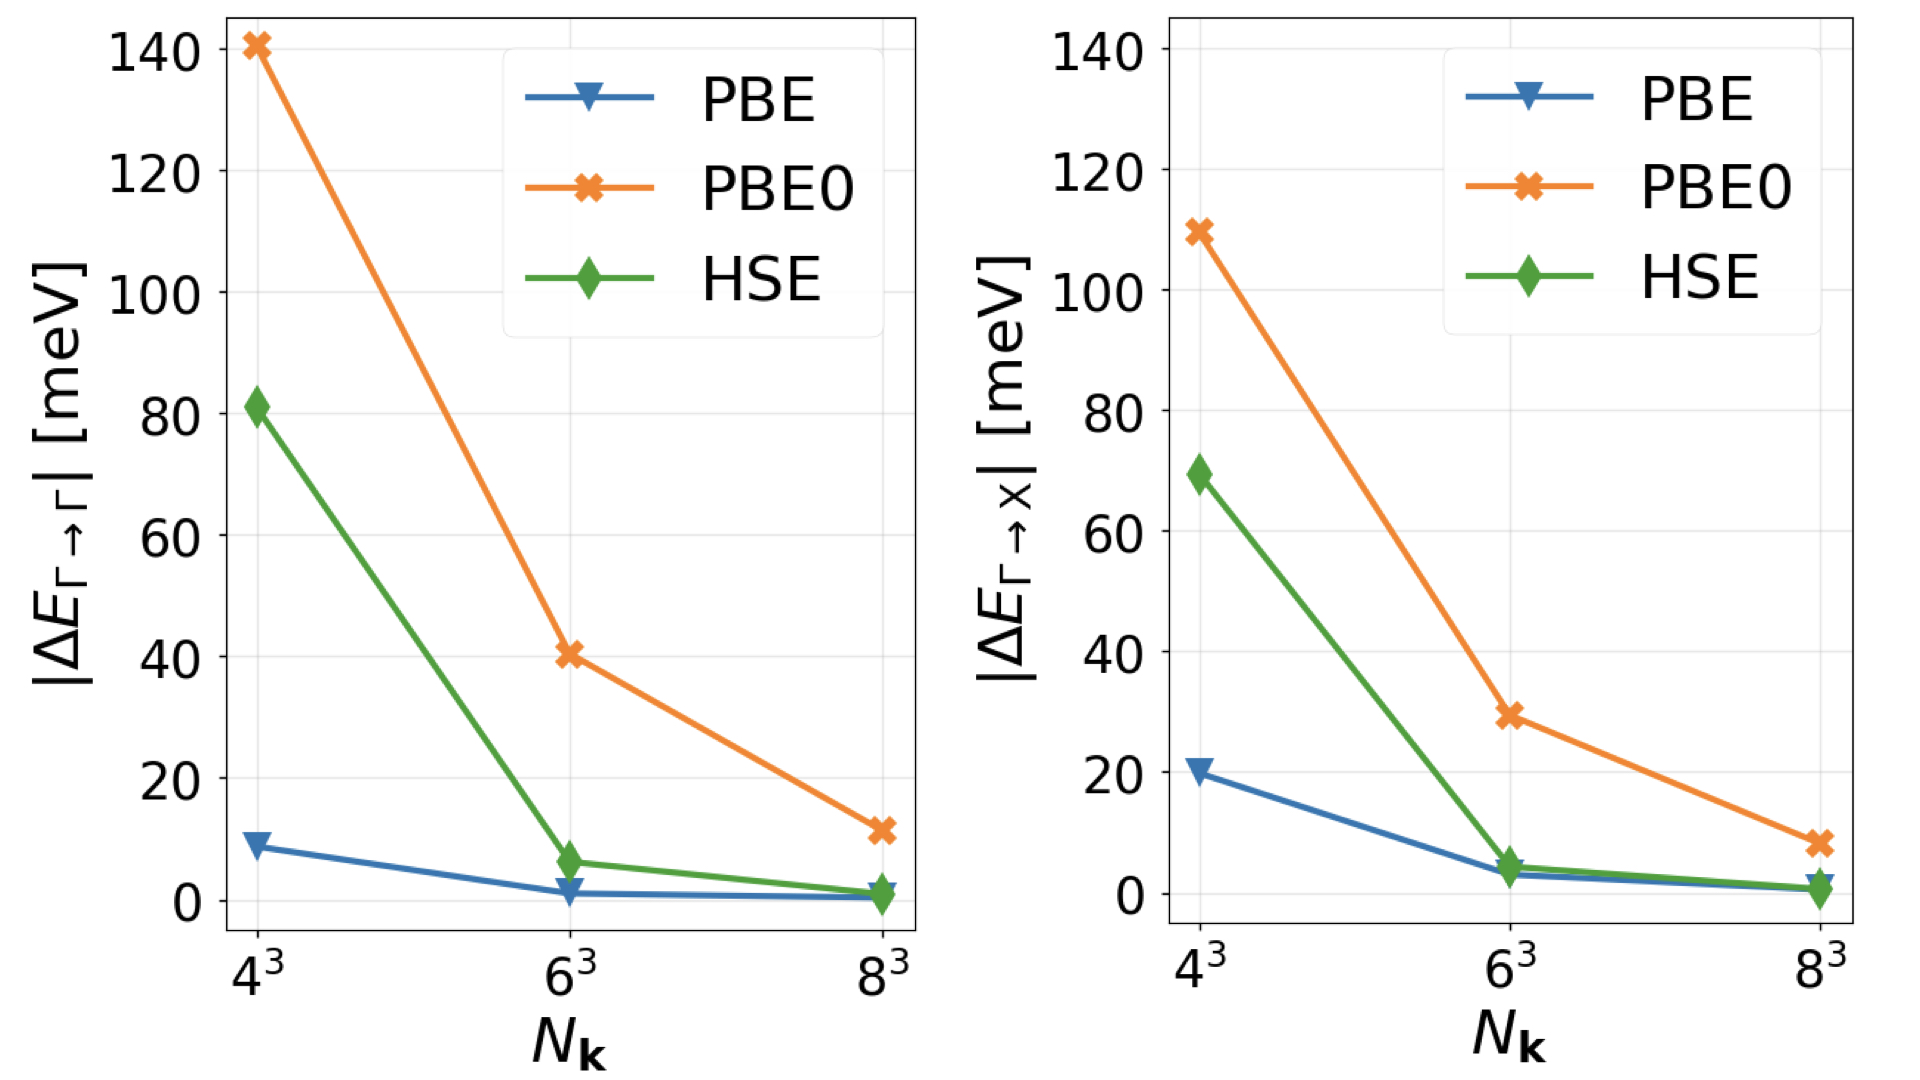" width="600" align="left"/>
</figure>


<p></p>   

To repeat the calculations with **PBE0** and **HSE**, for higher number of k-points, requires too much time for the purpose of this tutorial. You can try to reproduce these plots as an exercise.
</details>


<hr style="border:1px solid #DDD"> </hr>

We can now have a closer look to the most relevant parameters in ground-state calculations with hybrid functionals.

Parameter|Description
:-----------|:--------------------------------
<code><span style="color:mediumblue">xctype</span></code>=**"HYB_PBE0"** or **"HYB_HSE"**  |The type of (hybrid) functional used needs to be specified in <code><span style="color:mediumblue">xctype</span></code>. In **`exciting`** the hybrid functionals available are **PBE0** or **HSE** and the one shown are the respectively keywords.
<code><span style="color:mediumblue">nempty</span></code>=**"20"**|The number of empty states is crucial for the convergence and is dependent from <code><span style="color:mediumblue">rgkmax</span></code>.
<code><span style="color:mediumblue">excoeff</span></code>=**"0.25"**|Keyword, inside the element <code><span style="color:green">Hybrid</span></code>, for the mixing parameter $\alpha$. The default value is 0.25. 
<code><span style="color:mediumblue">omega</span></code>=**"0.11"**|Keyword, inside the element <code><span style="color:green">Hybrid</span></code>, for to screening parameter $\omega$ in units of $a_0^{-1}$ (only with **HSE**). The default value is 0.11 $a_0^{-1}$.

For further details on the parameters see [**Input Reference**](http://exciting.wikidot.com/ref:input).

<a id='5'></a>
<hr style="border:1px solid #DDD"> </hr>

### <span style="color:#15317E">5. Post Processing</span>

To observe some of the effects that the different functionals produce on the electronic structure, we compare the transition energies in specific high-symmetry points. Specifically, we will consider the following transition Γ→Γ and Γ→X.

To do this, move into the parent directory and run the script **`excitingscripts.compare_transition_energies`**.

In [1]:
%%bash
cd run_tutorial_hybrid_functional_calculations
python3 -m excitingscripts.compare_transition_energies -r PBE PBE0 HSE
cd ..


------------------------------------------------

 Transition energies in eV:

                 PBE              PBE0             HSE              
Gamma -> Gamma:  5.632            7.908            7.121            
Gamma -> X:      4.812            6.916            6.12             

------------------------------------------------



The ouput should look like this:
```
------------------------------------------------

 Transition energies in eV:

                 PBE              PBE0             HSE              
Gamma -> Gamma:  5.632            7.908            7.121            
Gamma -> X:      4.812            6.916            6.12             

------------------------------------------------
```

<a id='6'></a>
<hr style="border:1px solid #DDD"> </hr>

### <span style="color:#15317E">6. Band Structure and Density of States</span>

When hybrids functionals are employed, to compute properties, such as band structure and density of states, the **Wannier-functions interpolation schema** needs to be adopted. To use the Wannier interpolation schema is not straightforward and therefore there is a tutorial dedicated [**Wannier Functions for Interpolation in Reciprocal Space**](http://exciting.wikidot.com/neon-wannier-functions).

In the tutorials the properties are computed only for the hybrid functional **PBE0**, as exercise you can try to repeat the Wannier-functions tutorial for the hybrid functional **HSE**.

<a id='7'></a>
<hr style="border:1px solid #DDD"> </hr>

### <span style="color:#15317E">7. Exercise</span>

Try to modify some of the parameters such as <code><span style="color:mediumblue">rgkmax</span></code>, <code><span style="color:mediumblue">nempty</span></code> or <code><span style="color:mediumblue">ngridk</span></code> in the input files. Remember that the optimal value of <code><span style="color:mediumblue">nempty</span></code> depends on the value of <code><span style="color:mediumblue">rgkmax</span></code>. For more complex systems <code><span style="color:mediumblue">nempty</span></code> can be quite big.

In order to get an hint about the maximum number of empty states that can be considered, use the following command.

<div style="background-color: rgb(224, 224, 224);">

```bash
grep "Maximum Hamiltonian size" INFO.OUT
```

</div>


<hr style="border:1px solid #DDD"> </hr>

### <span style="color:#15317E">Literature</span>


- C. Adamo and V. Barone, *J. Chem. Phys.* **110**, 6158, (1999)
- M. Ernzerhof and G. E. Scuseria, *J. Chem. Phys.* **110**, 5029 (1999)
- A. V. Krukau et al., *J. Chem. Phys.* **125**, 224106 (2006)
- M. Schlipf et al., *Phys. Rev. B* **84**, 125142 (2011)

<hr style="border:2px solid #DDD"> </hr>